<a href="https://colab.research.google.com/github/vegedra/machine-learning-dados/blob/main/projeto_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Bibliotecas
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
# Carregar por URL
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
attributes = ["sepal_lenght", "sepal_witdh", "petal_lenght", "petal_width", "class"]
dataset = pandas.read_csv(url, names = attributes)
dataset.columns = attributes

In [15]:
# Dimensões do Dataset
print("Dimensões:", dataset.shape, "\n")

# Análise dos dados - as primeiras 20 linhas
print("Analise:\n", dataset.head(20), "\n")

# Resumo de cada atributo (contage, média, min-max, etc)
print("Resumo:\n", dataset.describe(), "\n")

# Distribuição de classe
print(dataset.groupby('class').size())

Dimensões: (150, 5) 

Analise:
     sepal_lenght  sepal_witdh  petal_lenght  petal_width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  

<function matplotlib.pyplot.show(close=None, block=None)>

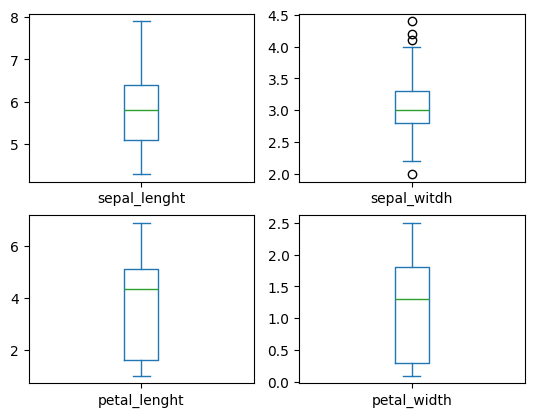

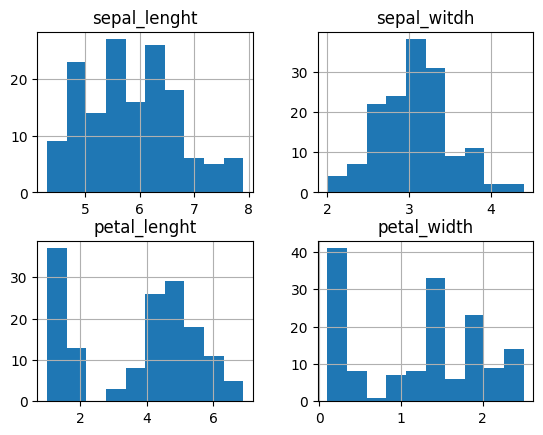

In [18]:
# Gráficos de cada variável individual e histograma
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
dataset.hist()
plt.show

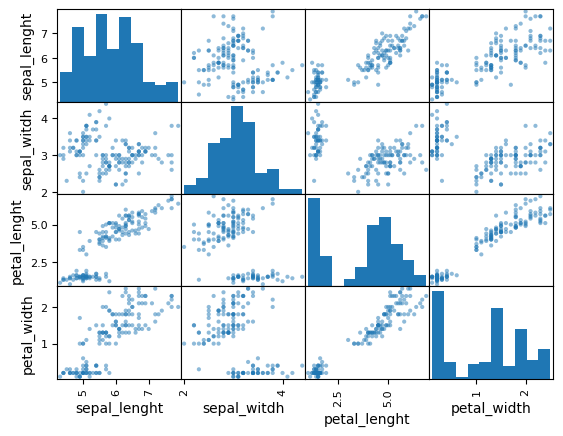

In [19]:
#Gráficos multivariados
scatter_matrix(dataset)
plt.show()

In [23]:
# Criação do conjunto de dados de validação
array = dataset.values
x = array[:,0:4]
y = array[:,4]
validation_size = 0.20
seed = 8
# Métrica para avaliar os modelos
scoring = 'accuracy'
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)

In [29]:
# Construção dos modelos
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Avaliação dos modelos
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
   cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

LR: 0.958333 (0.055902)
LDA: 0.983333 (0.033333)
KNN: 0.966667 (0.040825)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.038188)
SVM: 0.983333 (0.033333)


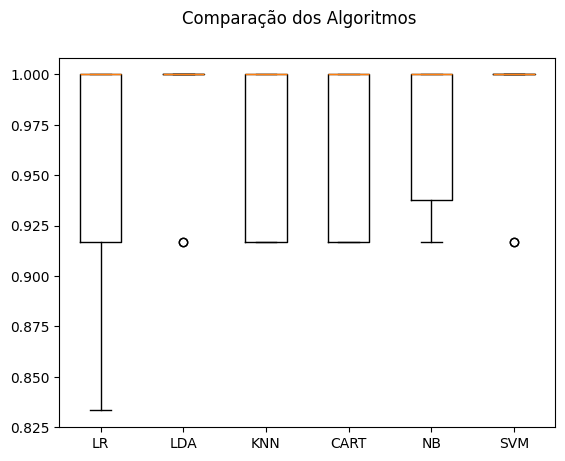

In [31]:
# Comparar algoritmos
fig = plt.figure()
fig.suptitle('Comparação dos Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [33]:
# Predições no Dataset de Validação
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predictions = knn.predict(x_validation)

print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.9
[[10  0  0]
 [ 0  8  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30

